# Logistic Regression

In [109]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

tf.__version__

'2.10.0'

## Make a dataset for Logistic Regression

### Logistic Regression을 위한 Dataset을 임의로 만들어 봅시다.

* 2가지 위치에 몰려있는 데이터
* 테스트를 위한 빨간색 데이터

## tf.data.Dataset
* 데이터를 관리해주기위한 tf function
* 각 데이터의 필요 기능들을 지원해준다.
* 데이터셋 크기가 클 경우에 메모리에 나눠올리는 기능을 지원

In [3]:
# dataset = tf.data.Dataset.from_tensor_slices(
#     (x_train, y_train))

# for t, l in dataset:
#   print(t, l)
#   break

In [192]:
data = pd.read_csv('logistic_regression_dataset_16_features.csv', )
data.head(10)

,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,feature11,feature12,feature13,feature14,feature15,feature16,target
0,1.593274,0.613349,0.309724,2.042536,-0.514878,0.997845,1.417079,-0.202117,0.072554,0.945508,-0.650232,-0.706413,2.469982,-1.962653,-0.626638,0.006014,1
1,0.568722,1.843700,-0.737456,-0.919461,0.417854,0.260081,0.443729,-0.833231,-0.072568,0.422924,-1.382024,-0.302917,0.587017,-0.834032,-2.269351,0.752771,0
2,-0.114487,0.271091,-1.536920,0.114670,-2.048833,0.925066,-0.076973,1.733600,0.608673,-1.175680,1.354920,1.463529,-0.397353,1.993837,0.318233,0.232441,1
3,0.251630,1.136448,-0.562255,-0.137424,-0.989744,1.476076,-1.091534,0.190649,0.650469,-0.204851,0.208252,1.800252,0.433550,-0.666660,-1.061392,0.591500,1
4,-1.210856,-1.738332,-1.599511,1.365527,-0.338294,-1.879252,-0.437457,-0.177810,-0.038883,0.956495,1.015896,0.465122,0.500297,0.976290,0.644269,-1.021144,0
5,-0.393734,0.707135,0.824390,-0.261638,1.503827,-0.782529,1.674010,-1.085025,0.645358,1.586134,-0.360298,-0.371584,1.236835,-0.803021,-0.500096,0.146819,1
6,0.085253,0.030386,2.491486,-1.286241,-0.258209,-1.402205,-2.924153,0.972262,1.519226,0.791284,1.031475,-0.297113,-1.019225,1.003510,-2.045259,0.994773,1
7,0.099422,0.765002,1.011855,-1.654657,-0.154596,-1.455286,1.682530,1.431472,-1.347119,-0.550834,0.770652,0.357193,-0.472224,0.438418,1.431038,-0.115347,1
8,-1.530616,0.867665,-0.281238,0.037233,-1.655827,-1.152335,-0.147113,-0.245073,0.311860,-0.671678,-1.467719,-2.678413,0.142993,1.193230,1.810005,-2.203884,0
9,0.327623,-2.256250,0.016707,1.270301,-0.093555,0.096549,-0.367859,-0.623254,-0.695882,-0.696827,0.494101,0.364937,-0.664375,-0.267144,-0.670133,-0.366456,0


In [193]:
x_train = data.iloc[:-100, :-1]
y_train = data.iloc[:-100, [-1]]
x_test = data.iloc[-100:, :-1]
y_test = data.iloc[-100:, [-1]]
x_train = tf.cast(x_train, dtype=tf.float32)
y_train = tf.cast(y_train, dtype=tf.float32)
x_test = tf.cast(x_test, dtype=tf.float32)
y_test = tf.cast(y_test, dtype=tf.float32)

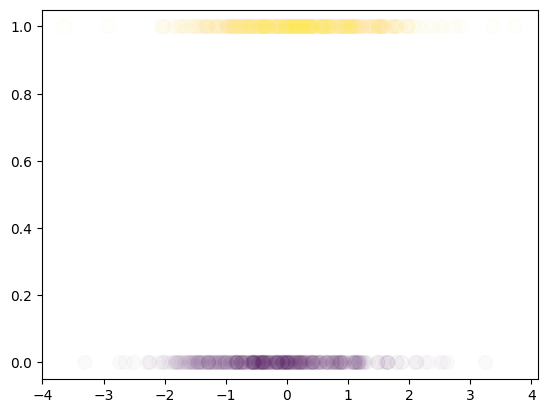

In [213]:
plt.scatter(x_train[:,0], y_train[:], c=y_train, s=100, cmap='viridis',alpha=0.02)

In [194]:
import numpy as np

def normalize_features(features):
    """
    각 특성을 정규화하는 함수.

    Parameters:
    - features: 2D NumPy 배열. 각 열은 하나의 특성을 나타냅니다.

    Returns:
    - normalized_features: 정규화된 특성을 담은 2D NumPy 배열.
    - mean_values: 각 특성의 평균을 담은 1D NumPy 배열.
    - std_dev_values: 각 특성의 표준 편차를 담은 1D NumPy 배열.
    """
    mean_values = np.mean(features, axis=0)
    std_dev_values = np.std(features, axis=0)

    # 0으로 나누기를 피하기 위해 표준 편차가 0이면 1로 대체
    std_dev_values[std_dev_values == 0] = 1.0

    normalized_features = (features - mean_values) / std_dev_values

    return normalized_features, mean_values, std_dev_values


In [195]:
x_train, mean_values, std_dev_values = normalize_features(x_train)

In [152]:
def log_normalize_features(features):
    """
    로그를 사용하여 각 특성을 정규화하는 함수.

    Parameters:
    - features: 2D NumPy 배열. 각 열은 하나의 특성을 나타냅니다.

    Returns:
    - log_normalized_features: 로그를 사용하여 정규화된 특성을 담은 2D NumPy 배열.
    - log_scaling_factors: 각 특성에 대한 로그 스케일링 계수를 담은 1D NumPy 배열.
    """
    epsilon = 1e-10  # 로그에 0이 들어가지 않도록 하기 위한 작은 값

    # 로그 스케일링 계수 계산
    log_scaling_factors = np.log(np.max(features, axis=0) + epsilon)

    # 로그를 사용하여 정규화
    log_normalized_features = np.log(features + epsilon) - log_scaling_factors

    return log_normalized_features, log_scaling_factors

In [153]:
x_train, log_scaling_factors = log_normalize_features(x_train)

/var/folders/b4/sv3y8crx3jx6kn5k220bs8bh0000gn/T/ipykernel_57047/2976153711.py:18: RuntimeWarning: invalid value encountered in log
  log_normalized_features = np.log(features + epsilon) - log_scaling_factors


In [196]:
dataset = tf.data.Dataset.from_tensor_slices(
    (x_train, y_train)).batch(len(x_train))

# for t, l in dataset:
#   print(t, l)
#   break

In [197]:


W = tf.Variable(tf.random.normal([16,1],0,1), name='weight')
b = tf.Variable(tf.random.normal([1],0,1), name='bias')
print(type(W[0,0]))

tf.print(W, b)

<class 'tensorflow.python.framework.ops.EagerTensor'>
[[-1.35441589]
 [0.704549313]
 [0.0366619118]
 ...
 [-1.96339905]
 [-0.0645248219]
 [-1.05684102]] [-1.35441589]


## Sigmoid 함수를 가설로 선언합니다
* Sigmoid는 아래 그래프와 같이 0과 1의 값만을 리턴합니다 tf.sigmoid(tf.matmul(X, W) + b)와 같습니다

## $$
\begin{align}
sigmoid(x) & = \frac{1}{1+e^{-x}}  \\\\\
\end{align}
$$

![sigmoid](https://upload.wikimedia.org/wikipedia/commons/8/88/Logistic-curve.svg)

In [198]:
def logistic_regression(features):
    hypothesis  = tf.divide(1., 1. + tf.exp(-(tf.matmul(features, W,) + b)))
    # tf.sigmoid(tf.matmul(features, W) + b)
    return hypothesis

tf.print(logistic_regression(x_train))

[[0.147597179]
 [0.00879183225]
 [0.581080139]
 ...
 [0.995038927]
 [0.550252855]
 [0.741961956]]


## 가설을 검증할 Cost 함수를 정의합니다
$$
\begin{align}
cost(h(x),y) & = −log(h(x))  &  if :  &  y=1 \\\\\
cost(h(x),y) & = -log(1−h(x))  &  if :  &  y=0
\end{align}
$$

### 두 식을 한번에 쓰게되면,

$$
\begin{align}
cost(h(x),y) & = −y log(h(x))−(1−y)log(1−h(x))
\end{align}
$$

In [199]:
def loss_fn(hypothesis, labels):
    cost = -tf.reduce_mean(labels * tf.math.log(hypothesis) + \
                           (1 - labels) * tf.math.log(1 - hypothesis))
    return cost

optimizer = tf.compat.v1.train.GradientDescentOptimizer(learning_rate=0.01)

In [200]:
epochs = 10000

for step in range(epochs):
  for features, labels in dataset:
    with tf.GradientTape() as tape:
      loss_value = loss_fn(logistic_regression(features),labels)
      grads = tape.gradient(loss_value, [W,b])
      optimizer.apply_gradients(grads_and_vars=zip(grads,[W,b]))
      if step % 100 == 0:
            print("Iter: {}, Loss: {:.4f}".format(step, loss_fn(logistic_regression(features),labels)))

Iter: 0, Loss: 1.7756
Iter: 100, Loss: 1.5051
Iter: 200, Loss: 1.2661
Iter: 300, Loss: 1.0601
Iter: 400, Loss: 0.8872
Iter: 500, Loss: 0.7461
Iter: 600, Loss: 0.6331
Iter: 700, Loss: 0.5440
Iter: 800, Loss: 0.4743
Iter: 900, Loss: 0.4203
Iter: 1000, Loss: 0.3788
Iter: 1100, Loss: 0.3469
Iter: 1200, Loss: 0.3225
Iter: 1300, Loss: 0.3038
Iter: 1400, Loss: 0.2893
Iter: 1500, Loss: 0.2780
Iter: 1600, Loss: 0.2691
Iter: 1700, Loss: 0.2619
Iter: 1800, Loss: 0.2560
Iter: 1900, Loss: 0.2512
Iter: 2000, Loss: 0.2471
Iter: 2100, Loss: 0.2436
Iter: 2200, Loss: 0.2406
Iter: 2300, Loss: 0.2380
Iter: 2400, Loss: 0.2356
Iter: 2500, Loss: 0.2335
Iter: 2600, Loss: 0.2316
Iter: 2700, Loss: 0.2299
Iter: 2800, Loss: 0.2283
Iter: 2900, Loss: 0.2268
Iter: 3000, Loss: 0.2254
Iter: 3100, Loss: 0.2241
Iter: 3200, Loss: 0.2228
Iter: 3300, Loss: 0.2217
Iter: 3400, Loss: 0.2206
Iter: 3500, Loss: 0.2195
Iter: 3600, Loss: 0.2185
Iter: 3700, Loss: 0.2176
Iter: 3800, Loss: 0.2166
Iter: 3900, Loss: 0.2158
Iter: 4000, 

In [201]:
def accuracy_fn(hypothesis, labels):
    print(hypothesis)
    predicted = tf.cast(hypothesis > 0.5, dtype=tf.float32)
    print(predicted, labels)
    accuracy = tf.reduce_mean(tf.cast(tf.equal(predicted, labels), dtype=tf.float32))
    return accuracy

In [202]:
test_acc = accuracy_fn(logistic_regression(x_test),y_test)
print("Testset Accuracy: {:.4f}".format(test_acc))

tf.Tensor(
[[3.0303851e-02]
 [9.9989712e-01]
 [1.8710135e-03]
 [8.2312565e-04]
 [9.8410678e-01]
 [7.0145363e-01]
 [9.4009554e-01]
 [9.9606967e-01]
 [1.5780291e-03]
 [9.5224929e-01]
 [3.4719712e-01]
 [6.2059337e-01]
 [1.9421008e-01]
 [4.7132090e-02]
 [8.2206511e-01]
 [1.1361805e-01]
 [9.9799830e-01]
 [9.0004778e-01]
 [9.8840404e-01]
 [3.6484897e-02]
 [9.9977845e-01]
 [9.4355935e-01]
 [4.1429587e-03]
 [1.5723597e-01]
 [5.4949397e-01]
 [1.9105767e-03]
 [8.2611948e-02]
 [5.6330252e-01]
 [9.9384600e-01]
 [9.9181014e-01]
 [1.7175414e-02]
 [7.3525649e-01]
 [4.5637208e-01]
 [6.9982022e-01]
 [8.3756649e-01]
 [1.5449381e-01]
 [9.9911767e-01]
 [3.0699182e-01]
 [1.5106055e-01]
 [9.9980778e-01]
 [2.1818193e-02]
 [5.2709502e-01]
 [7.7225333e-01]
 [4.9459663e-06]
 [9.7766382e-01]
 [9.9951947e-01]
 [9.9632603e-01]
 [9.4999683e-01]
 [1.3416467e-03]
 [4.5950182e-02]
 [3.6033842e-01]
 [9.9084389e-01]
 [9.7376537e-01]
 [9.9724114e-01]
 [8.0203563e-02]
 [9.4455487e-01]
 [4.8433803e-03]
 [6.2802029e-01]
 [9